# Evaluación Data Scientist

- Objetivo: Evaluación de análisis de datos, identificación de patrones, segmentación mediante clustering y generación de modelos predictivos.

### 1. Análisis exploratorio de los datos.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('dataset_ventas.csv')

In [3]:
dataset.head()

,ID Producto,ID Tienda,Fecha de Venta,Cantidad Vendida,Precio Unitario,Categoría de Producto,Ubicación de Tienda,Promoción o Descuento,Estacionalidad,Método de Pago,Nivel de Inventario
0,Producto_43,Tienda_2,2023-02-13,81,498.48,Deportes,Zona Este,1,1,Efectivo,10
1,Producto_22,Tienda_1,2023-04-19,25,204.46,Juguetes,Zona Norte,0,1,Crédito,100
2,Producto_27,Tienda_6,2022-05-29,13,253.30,Alimentos,Zona Este,1,0,Crédito,100
3,Producto_6,Tienda_6,2022-08-15,67,134.23,Electrónica,Zona Norte,0,1,Efectivo,50
4,Producto_1,Tienda_5,2023-02-02,21,329.80,Alimentos,Zona Este,1,0,Efectivo,300


In [4]:
len(dataset)

10000

In [5]:
dataset.dtypes

,0
ID Producto,object
ID Tienda,object
Fecha de Venta,object
Cantidad Vendida,int64
Precio Unitario,float64
Categoría de Producto,object
Ubicación de Tienda,object
Promoción o Descuento,int64
Estacionalidad,int64
Método de Pago,object


- Ventas por categoría

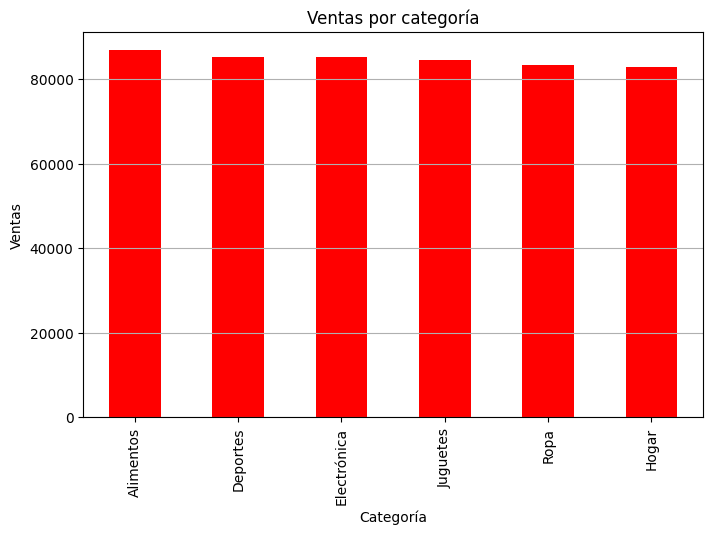

In [6]:
categoria_ventas = dataset.groupby('Categoría de Producto')['Cantidad Vendida'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
categoria_ventas.plot(kind='bar', color='red')
plt.title("Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.grid(axis='y')
plt.show()

- Venta por zona

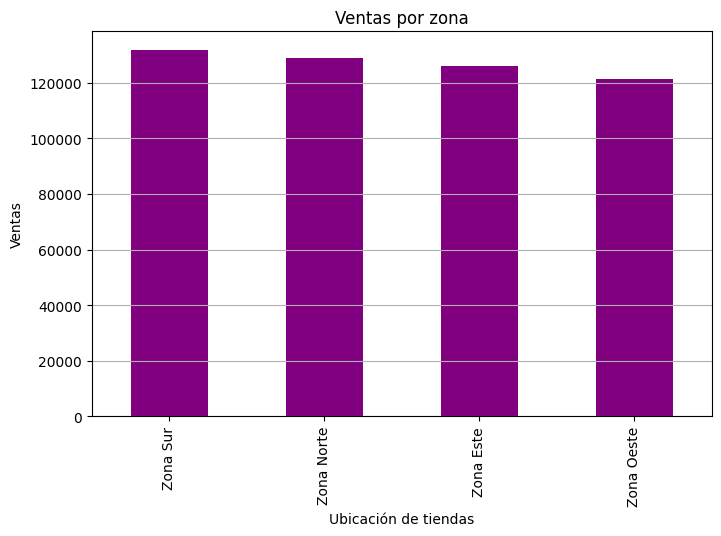

In [7]:
zona_ventas = dataset.groupby('Ubicación de Tienda')['Cantidad Vendida'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
zona_ventas.plot(kind='bar', color='purple')
plt.title("Ventas por zona")
plt.xlabel("Ubicación de tiendas")
plt.ylabel("Ventas")
plt.grid(axis='y')
plt.show()

- Ventas con o sin descuento

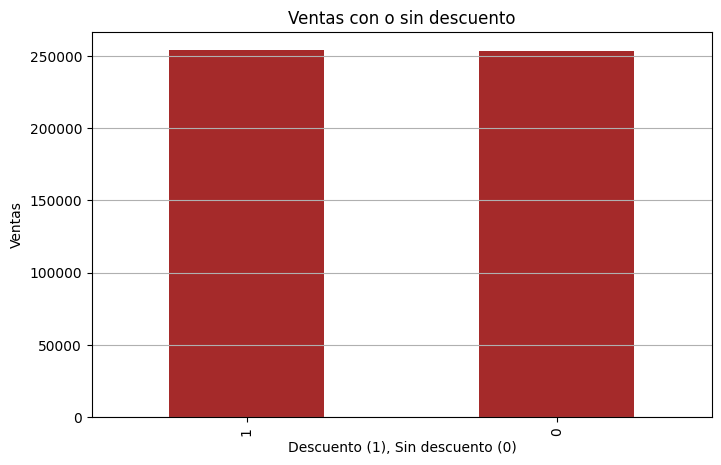

In [8]:
descuento_ventas = dataset.groupby('Promoción o Descuento')['Cantidad Vendida'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
descuento_ventas.plot(kind='bar', color='brown')
plt.title("Ventas con o sin descuento")
plt.xlabel("Descuento (1), Sin descuento (0)")
plt.ylabel("Ventas")
plt.grid(axis='y')
plt.show()

In [9]:
descuento_ventas

,Cantidad Vendida
Promoción o Descuento,
1,254018
0,253793


- Venta en período estacional o no estacional

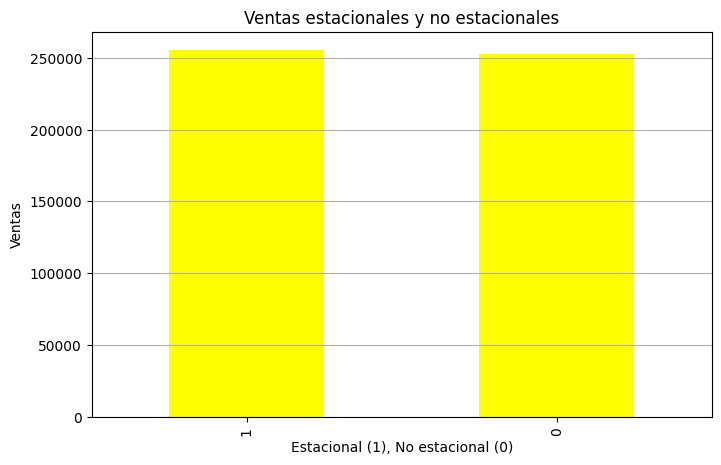

In [10]:
estacionalidad_ventas = dataset.groupby('Estacionalidad')['Cantidad Vendida'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
estacionalidad_ventas.plot(kind='bar', color='yellow')
plt.title("Ventas estacionales y no estacionales")
plt.xlabel("Estacional (1), No estacional (0)")
plt.ylabel("Ventas")
plt.grid(axis='y')
plt.show()

In [11]:
estacionalidad_ventas

,Cantidad Vendida
Estacionalidad,
1,255280
0,252531


- Forma de pago

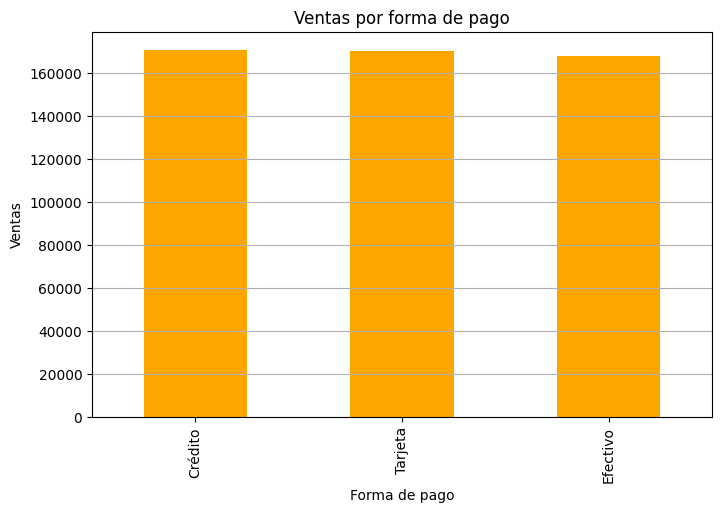

In [12]:
pago_ventas = dataset.groupby('Método de Pago')['Cantidad Vendida'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
pago_ventas.plot(kind='bar', color='orange')
plt.title("Ventas por forma de pago")
plt.xlabel("Forma de pago")
plt.ylabel("Ventas")
plt.grid(axis='y')
plt.show()

In [13]:
pago_ventas

,Cantidad Vendida
Método de Pago,
Crédito,170465
Tarjeta,169862
Efectivo,167484


- Venta General 2022 y 2023

<ipython-input-14-e26e0a63f52f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  general_ventas = dataset.groupby(pd.Grouper(key='Fecha de Venta', axis=0, freq='M'))['Cantidad Vendida'].sum()


<Axes: title={'center': 'Venta general (por mes)'}, xlabel='Fecha', ylabel='Venta'>

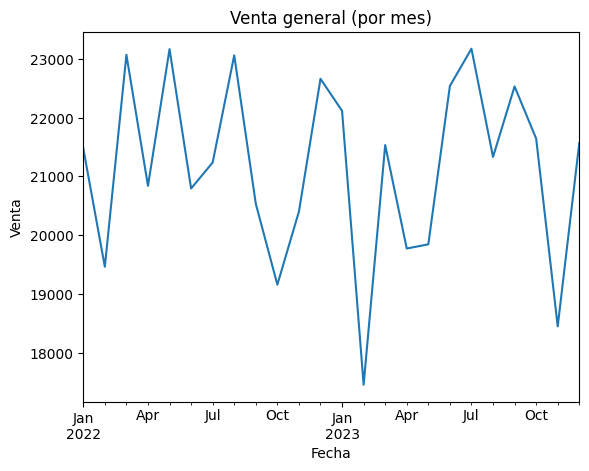

In [14]:
dataset['Fecha de Venta'] = pd.to_datetime(dataset['Fecha de Venta'])

general_ventas = dataset.groupby(pd.Grouper(key='Fecha de Venta', axis=0, freq='M'))['Cantidad Vendida'].sum()


general_ventas.plot(title='Venta general (por mes)', xlabel='Fecha', ylabel='Venta')


### 2. Clasificación de productos por Comportamiento de venta

- Productos más vendidos por ID

In [15]:
data_product = dataset

data_product

,ID Producto,ID Tienda,Fecha de Venta,Cantidad Vendida,Precio Unitario,Categoría de Producto,Ubicación de Tienda,Promoción o Descuento,Estacionalidad,Método de Pago,Nivel de Inventario
0,Producto_43,Tienda_2,2023-02-13,81,498.48,Deportes,Zona Este,1,1,Efectivo,10
1,Producto_22,Tienda_1,2023-04-19,25,204.46,Juguetes,Zona Norte,0,1,Crédito,100
2,Producto_27,Tienda_6,2022-05-29,13,253.30,Alimentos,Zona Este,1,0,Crédito,100
3,Producto_6,Tienda_6,2022-08-15,67,134.23,Electrónica,Zona Norte,0,1,Efectivo,50
4,Producto_1,Tienda_5,2023-02-02,21,329.80,Alimentos,Zona Este,1,0,Efectivo,300
...,...,...,...,...,...,...,...,...,...,...,...
9995,Producto_41,Tienda_6,2022-12-11,38,378.54,Juguetes,Zona Este,1,1,Efectivo,30
9996,Producto_33,Tienda_5,2023-07-27,79,78.07,Deportes,Zona Este,1,1,Efectivo,500
9997,Producto_19,Tienda_4,2023-01-25,13,250.38,Electrónica,Zona Sur,0,1,Crédito,50
9998,Producto_42,Tienda_4,2023-10-30,69,401.09,Ropa,Zona Sur,1,1,Efectivo,20


In [16]:
data_product = data_product.groupby('ID Producto')['Cantidad Vendida'].sum()
data_product = data_product.reset_index()

In [17]:
ventas_altas = data_product[data_product['Cantidad Vendida'] > round(data_product['Cantidad Vendida'].mean())]
len(ventas_altas)

25

In [18]:
ventas_bajas = data_product[data_product['Cantidad Vendida'] < round(data_product['Cantidad Vendida'].mean())]
len(ventas_bajas)

25

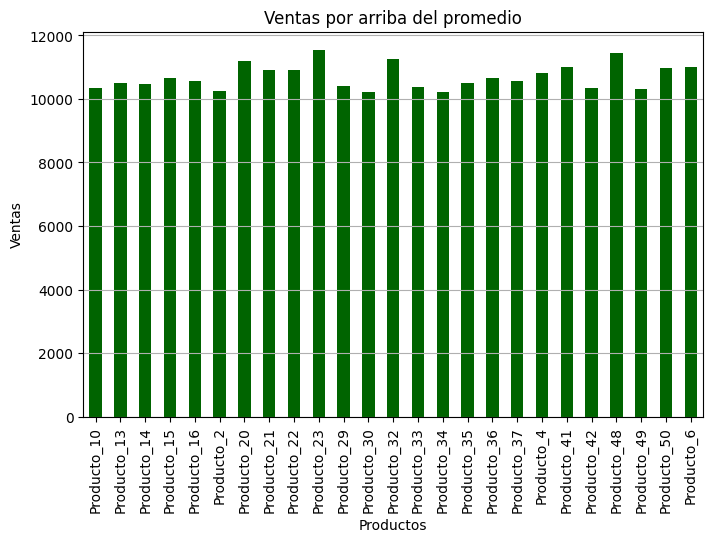

In [19]:
ventas_altas = ventas_altas.groupby('ID Producto')['Cantidad Vendida'].sum()
plt.figure(figsize=(8, 5))
ventas_altas.plot(kind='bar', color='darkgreen')
plt.title("Ventas por arriba del promedio")
plt.xlabel("Productos")
plt.ylabel("Ventas")
plt.grid(axis='y')
plt.show()

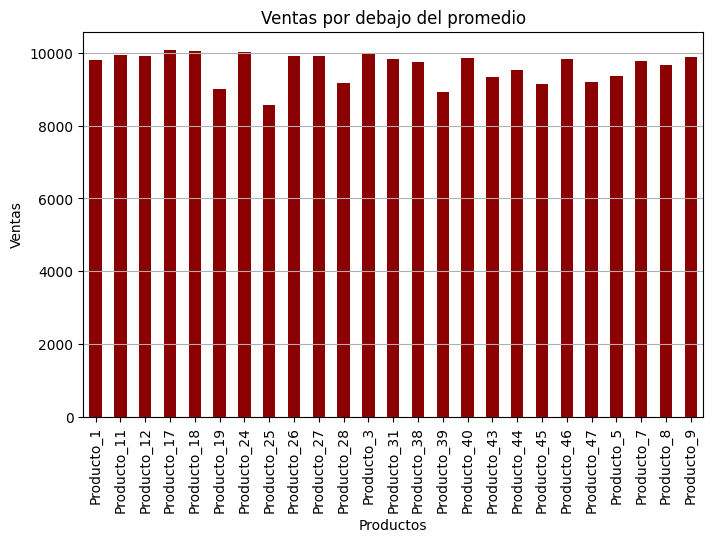

In [20]:
ventas_bajas = ventas_bajas.groupby('ID Producto')['Cantidad Vendida'].sum()
plt.figure(figsize=(8, 5))
ventas_bajas.plot(kind='bar', color='darkred')
plt.title("Ventas por debajo del promedio")
plt.xlabel("Productos")
plt.ylabel("Ventas")
plt.grid(axis='y')
plt.show()

### 3. Clasificación de Tiendas por Comportamiento de Venta

In [21]:
data_store = dataset

In [22]:
data_store = data_store.groupby(['ID Tienda', 'Ubicación de Tienda'])['Cantidad Vendida'].sum().sort_values(ascending=False)
data_store = data_store.reset_index()

In [23]:
data_store = data_store.pivot(index='ID Tienda', columns='Ubicación de Tienda', values='Cantidad Vendida')
data_store

Ubicación de Tienda,Zona Este,Zona Norte,Zona Oeste,Zona Sur
ID Tienda,,,,
Tienda_1,10833,13388,12933,13200
Tienda_10,13371,12548,11370,12103
Tienda_2,11280,13412,13158,12537
Tienda_3,13279,12688,12570,13860
Tienda_4,12788,13615,12741,14254
Tienda_5,12520,12153,11061,12950
Tienda_6,12683,12433,11352,12693
Tienda_7,12792,13178,12514,13626
Tienda_8,13248,13060,12067,13572


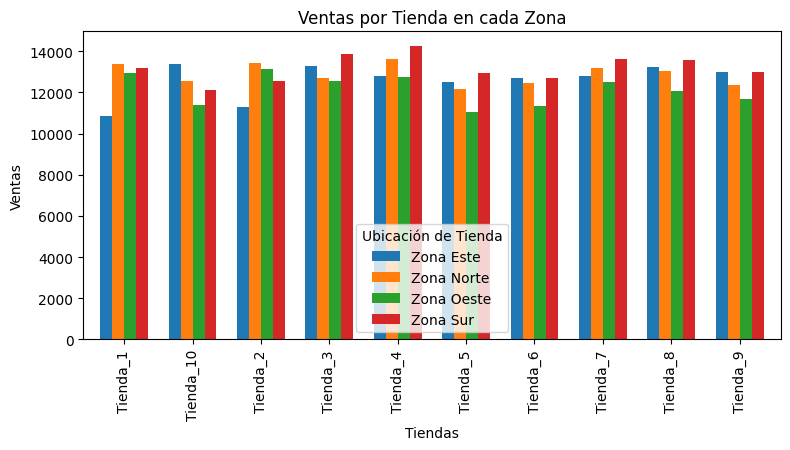

In [24]:
data_store.plot(kind='bar', width=0.7, figsize=(9, 4))
plt.title("Ventas por Tienda en cada Zona")
plt.xlabel("Tiendas")
plt.ylabel("Ventas")
plt.show()

### 4. Clustering de Productos

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
import numpy as np

cluster_products = dataset

cluster_products['Ingreso'] = cluster_products['Cantidad Vendida'] * cluster_products['Precio Unitario']

In [26]:
cluster_products = cluster_products.groupby('ID Producto').agg({
    'Cantidad Vendida':'sum',
    'Precio Unitario':'mean',
    'Nivel de Inventario':'sum',
    'Ingreso':'sum'
}).reset_index()

cluster_products

,ID Producto,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso
0,Producto_1,9800,247.763144,24550,2495000.58
1,Producto_10,10355,253.819387,26240,2591236.70
2,Producto_11,9927,264.056533,30570,2674458.52
3,Producto_12,9910,259.836649,25915,2564524.99
4,Producto_13,10511,245.676667,27405,2560554.27
5,Producto_14,10462,266.403596,28440,2894707.95
6,Producto_15,10659,243.795837,27810,2523537.84
7,Producto_16,10559,257.690194,28020,2736781.07
8,Producto_17,10078,255.175238,24590,2550689.62
9,Producto_18,10054,238.627150,28475,2405661.40


In [27]:
cluster_products.describe()

,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso
count,50.00000,50.000000,50.000000,5.000000e+01
mean,10156.22000,252.442010,26816.100000,2.557351e+06
std,675.68986,10.640006,2830.136344,2.183967e+05
min,8578.00000,227.634183,20090.000000,2.117887e+06
25%,9803.75000,243.267167,25183.750000,2.385641e+06
50%,10148.50000,253.789826,27090.000000,2.555622e+06
75%,10562.00000,259.640866,28372.500000,2.714932e+06
max,11543.00000,273.558923,33210.000000,3.085553e+06


In [28]:
scalerMinMax = MinMaxScaler()

cluster_products_norm = cluster_products.drop(['ID Producto'], axis=1)

cluster_products_norm = scalerMinMax.fit_transform(cluster_products_norm)

cluster_products_norm = pd.DataFrame(cluster_products_norm, columns=['Cantidad Vendida', 'Precio Unitario', 'Nivel de Inventario', 'Ingreso'])

cluster_products_norm.describe()

,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso
count,50.000000,50.000000,50.000000,50.000000
mean,0.532283,0.540184,0.512660,0.454149
std,0.227889,0.231684,0.215712,0.225694
min,0.000000,0.000000,0.000000,0.000000
25%,0.413406,0.340404,0.388243,0.276701
50%,0.529680,0.569533,0.533537,0.452362
75%,0.669140,0.696938,0.631288,0.616995
max,1.000000,1.000000,1.000000,1.000000


In [29]:
cluster_products_norm.head()

,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso
0,0.412142,0.438303,0.339939,0.389715
1,0.599325,0.570176,0.468750,0.489167
2,0.454975,0.793088,0.798780,0.575169
3,0.449241,0.701201,0.443979,0.461562
4,0.651939,0.392871,0.557546,0.457459


In [30]:
print(cluster_products_norm.shape)

(50, 4)


- Identificación del número óptimo de clústeres

In [31]:
wcss = []
silhouette_scores = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(cluster_products_norm)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_products_norm, kmeans.labels_))

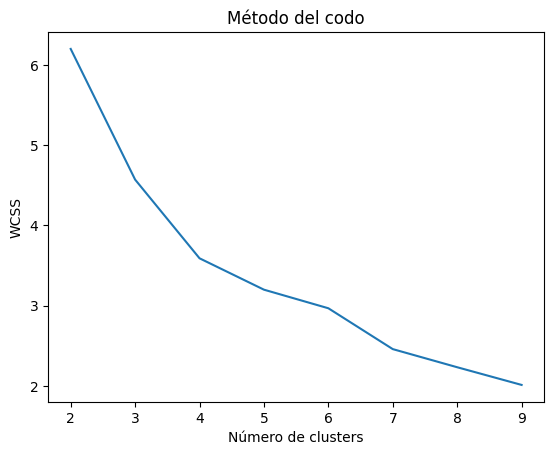

In [32]:
plt.plot(range(2, 10), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


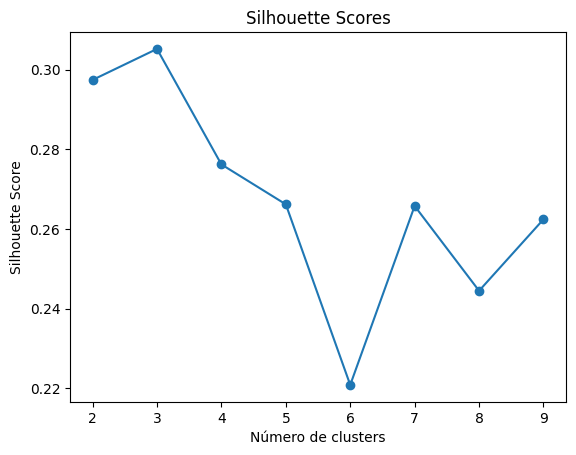

In [33]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.show()

- Generación de clusters

In [34]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(cluster_products_norm)

KMeans(n_clusters=3)

In [35]:
cluster_products['KMeans_clusters'] = clustering.labels_
cluster_products.head()

,ID Producto,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso,KMeans_clusters
0,Producto_1,9800,247.763144,24550,2495000.58,1
1,Producto_10,10355,253.819387,26240,2591236.70,0
2,Producto_11,9927,264.056533,30570,2674458.52,0
3,Producto_12,9910,259.836649,25915,2564524.99,0
4,Producto_13,10511,245.676667,27405,2560554.27,2


- Implementación de PCA para identificación de Clusters

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_productos = pca.fit_transform(cluster_products_norm)
pca_productos_df = pd.DataFrame(data=pca_productos, columns=['PC1', 'PC2'])
pca_productos_venta = pd.concat([pca_productos_df, cluster_products[['KMeans_clusters']]], axis=1)

pca_productos_venta

,PC1,PC2,KMeans_clusters
0,-0.214238,0.010494,1
1,0.050847,0.026816,0
2,0.230870,0.143718,0
3,-0.023432,0.191306,0
4,0.045182,-0.180254,2
5,0.423753,0.228068,0
6,0.050511,-0.248751,2
7,0.268537,0.045112,0
8,-0.073903,0.125106,1
9,-0.155742,-0.317795,2


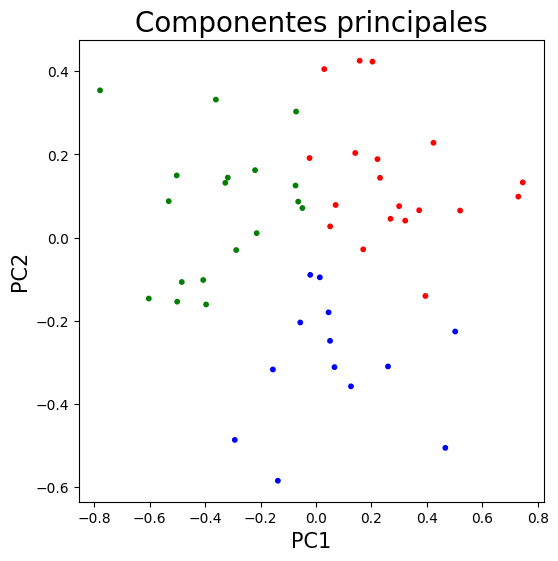

In [38]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Componentes principales', fontsize=20)

color_theme = np.array(['red', 'green', 'blue'])
ax.scatter(x=pca_productos_venta.PC1, y=pca_productos_venta.PC2, c=color_theme[pca_productos_venta.KMeans_clusters], s=10)

plt.show()

### 5. Clustering de Tiendas

In [39]:
cluster_stores = dataset

cluster_stores['Ingreso'] = cluster_stores['Cantidad Vendida'] * cluster_stores['Precio Unitario']

In [40]:
cluster_stores = cluster_stores.groupby('ID Tienda').agg({
    'Cantidad Vendida':'sum',
    'Precio Unitario':'mean',
    'Nivel de Inventario':'sum',
    'Ingreso':'sum',
    'Fecha de Venta':'count'
}).reset_index()

cluster_stores

,ID Tienda,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso,Fecha de Venta
0,Tienda_1,50354,255.215198,142285,12809161.35,983
1,Tienda_10,49392,252.297809,127925,12268757.07,995
2,Tienda_2,50387,254.258492,131540,12712062.52,995
3,Tienda_3,52397,257.601249,134910,13305197.87,1009
4,Tienda_4,53398,249.248964,131340,13316762.22,1042
5,Tienda_5,48684,253.768592,133515,12247805.33,994
6,Tienda_6,49161,252.560768,139455,12505727.77,976
7,Tienda_7,52110,243.504510,137185,12914075.09,1000
8,Tienda_8,51947,254.191807,135175,13228999.15,1013
9,Tienda_9,49981,251.749396,127475,12559010.67,993


In [41]:
cluster_stores.describe()

,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso,Fecha de Venta
count,10.000000,10.000000,10.00000,1.000000e+01,10.00000
mean,50781.100000,252.439678,134080.50000,1.278676e+07,1000.00000
std,1581.653035,3.844456,4755.46554,4.023810e+05,18.29997
min,48684.000000,243.504510,127475.00000,1.224781e+07,976.00000
25%,49539.250000,251.886499,131390.00000,1.251905e+07,993.25000
50%,50370.500000,253.164680,134212.50000,1.276061e+07,995.00000
75%,52069.250000,254.241821,136682.50000,1.315027e+07,1006.75000
max,53398.000000,257.601249,142285.00000,1.331676e+07,1042.00000


In [42]:
cluster_stores_norm = cluster_stores.drop(['ID Tienda'], axis=1)

cluster_stores_norm = scalerMinMax.fit_transform(cluster_stores_norm)

cluster_stores_norm = pd.DataFrame(cluster_stores_norm, columns=['Cantidad Vendida', 'Precio Unitario', 'Nivel de Inventario', 'Ingreso', 'Fecha de Venta'])

cluster_stores_norm.describe()

,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso,Fecha de Venta
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.444866,0.633846,0.446016,0.504184,0.363636
std,0.335522,0.272719,0.321098,0.376424,0.277272
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181428,0.594605,0.264348,0.253746,0.261364
50%,0.357764,0.685277,0.454929,0.479726,0.287879
75%,0.718127,0.761688,0.621708,0.844246,0.465909
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
cluster_stores_norm.head()

,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso,Fecha de Venta
0,0.354264,0.830737,1.000000,0.525144,0.106061
1,0.150191,0.623783,0.030385,0.019600,0.287879
2,0.361264,0.762870,0.274477,0.434309,0.287879
3,0.787654,1.000000,0.502026,0.989182,0.500000
4,1.000000,0.407502,0.260972,1.000000,1.000000


- Número óptimo de clústers

In [44]:
wcss = []
silhouette_scores = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(cluster_stores_norm)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_stores_norm, kmeans.labels_))

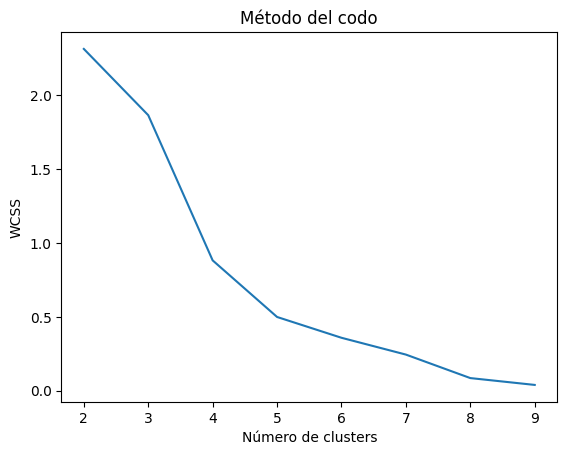

In [45]:
plt.plot(range(2, 10), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

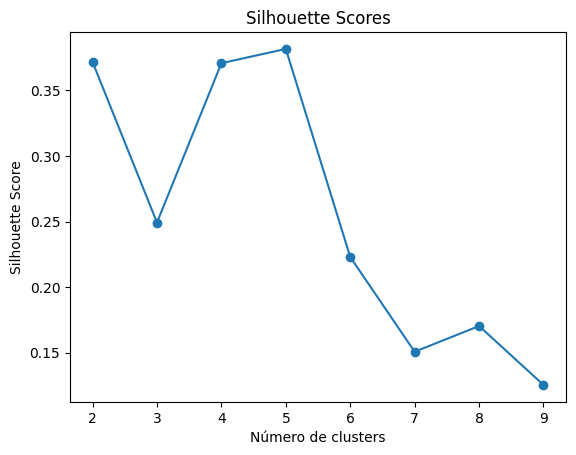

In [46]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [47]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(cluster_stores_norm)

KMeans(n_clusters=5)

In [48]:
cluster_stores['KMeans_clusters'] = clustering.labels_
cluster_stores.head()

,ID Tienda,Cantidad Vendida,Precio Unitario,Nivel de Inventario,Ingreso,Fecha de Venta,KMeans_clusters
0,Tienda_1,50354,255.215198,142285,12809161.35,983,3
1,Tienda_10,49392,252.297809,127925,12268757.07,995,4
2,Tienda_2,50387,254.258492,131540,12712062.52,995,0
3,Tienda_3,52397,257.601249,134910,13305197.87,1009,1
4,Tienda_4,53398,249.248964,131340,13316762.22,1042,1


In [49]:
pca_tiendas = pca.fit_transform(cluster_stores_norm)
pca_tiendas_df = pd.DataFrame(data=pca_tiendas, columns=['PC1', 'PC2'])
pca_tiendas_venta = pd.concat([pca_tiendas_df, cluster_stores[['KMeans_clusters']]], axis=1)

pca_tiendas_venta

,PC1,PC2,KMeans_clusters
0,-0.149173,0.628913,3
1,-0.546379,-0.445726,4
2,-0.147153,-0.111482,0
3,0.556956,0.184130,1
4,0.951390,-0.332861,1
5,-0.653047,-0.084422,4
6,-0.526188,0.396459,3
7,0.314649,0.066722,2
8,0.499997,0.111921,1
9,-0.301051,-0.413654,4


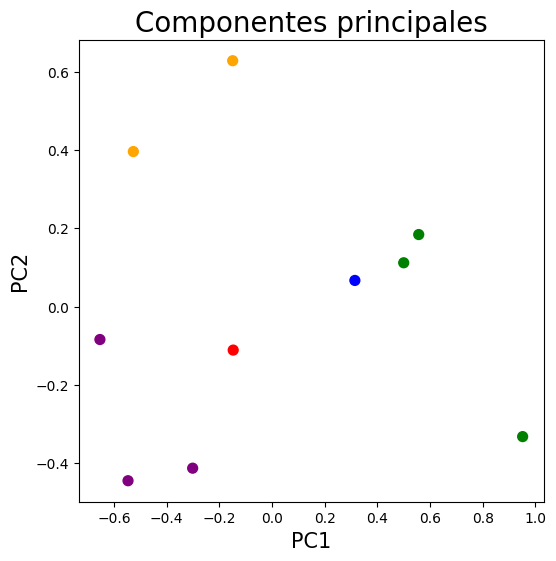

In [50]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Componentes principales', fontsize=20)

color_theme = np.array(['red', 'green', 'blue', 'orange', 'purple'])
ax.scatter(x=pca_tiendas_venta.PC1, y=pca_tiendas_venta.PC2, c=color_theme[pca_tiendas_venta.KMeans_clusters], s=50)

plt.show()

### 6. Identificación de Tendencias y Comportamientos

In [51]:
data_comportamiento = dataset
data_comportamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID Producto            10000 non-null  object        
 1   ID Tienda              10000 non-null  object        
 2   Fecha de Venta         10000 non-null  datetime64[ns]
 3   Cantidad Vendida       10000 non-null  int64         
 4   Precio Unitario        10000 non-null  float64       
 5   Categoría de Producto  10000 non-null  object        
 6   Ubicación de Tienda    10000 non-null  object        
 7   Promoción o Descuento  10000 non-null  int64         
 8   Estacionalidad         10000 non-null  int64         
 9   Método de Pago         10000 non-null  object        
 10  Nivel de Inventario    10000 non-null  int64         
 11  Ingreso                10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory 

In [52]:
data_comportamiento['Fecha de Venta'] = pd.to_datetime(data_comportamiento['Fecha de Venta'])
data_comportamiento.head()

,ID Producto,ID Tienda,Fecha de Venta,Cantidad Vendida,Precio Unitario,Categoría de Producto,Ubicación de Tienda,Promoción o Descuento,Estacionalidad,Método de Pago,Nivel de Inventario,Ingreso
0,Producto_43,Tienda_2,2023-02-13,81,498.48,Deportes,Zona Este,1,1,Efectivo,10,40376.88
1,Producto_22,Tienda_1,2023-04-19,25,204.46,Juguetes,Zona Norte,0,1,Crédito,100,5111.50
2,Producto_27,Tienda_6,2022-05-29,13,253.30,Alimentos,Zona Este,1,0,Crédito,100,3292.90
3,Producto_6,Tienda_6,2022-08-15,67,134.23,Electrónica,Zona Norte,0,1,Efectivo,50,8993.41
4,Producto_1,Tienda_5,2023-02-02,21,329.80,Alimentos,Zona Este,1,0,Efectivo,300,6925.80


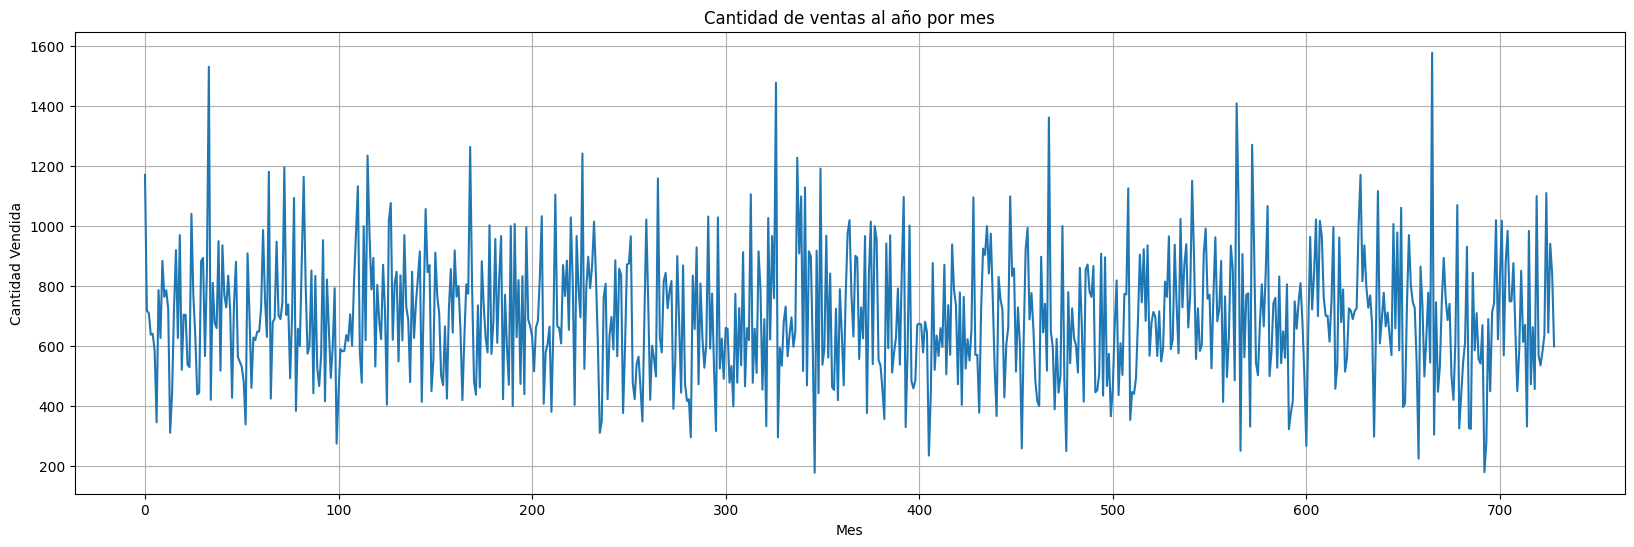

In [53]:
ventas_mensuales = data_comportamiento.groupby('Fecha de Venta')['Cantidad Vendida'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(ventas_mensuales['Cantidad Vendida'])
plt.title('Cantidad de ventas al año por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()

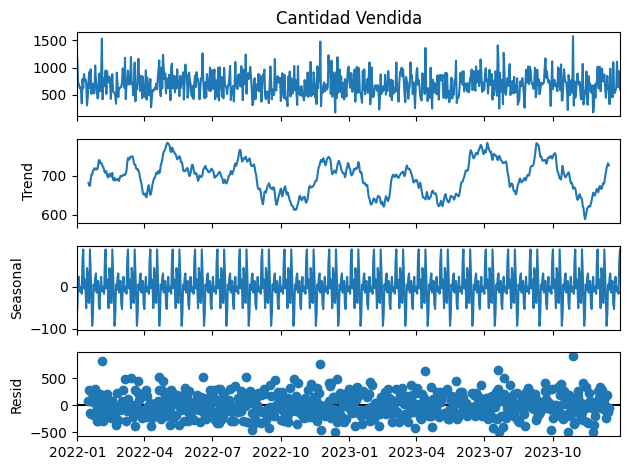

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

serie_tiempo = data_comportamiento.groupby('Fecha de Venta')['Cantidad Vendida'].sum()
descomposicion = seasonal_decompose(serie_tiempo, model='additive', period=30)

descomposicion.plot()
plt.show()

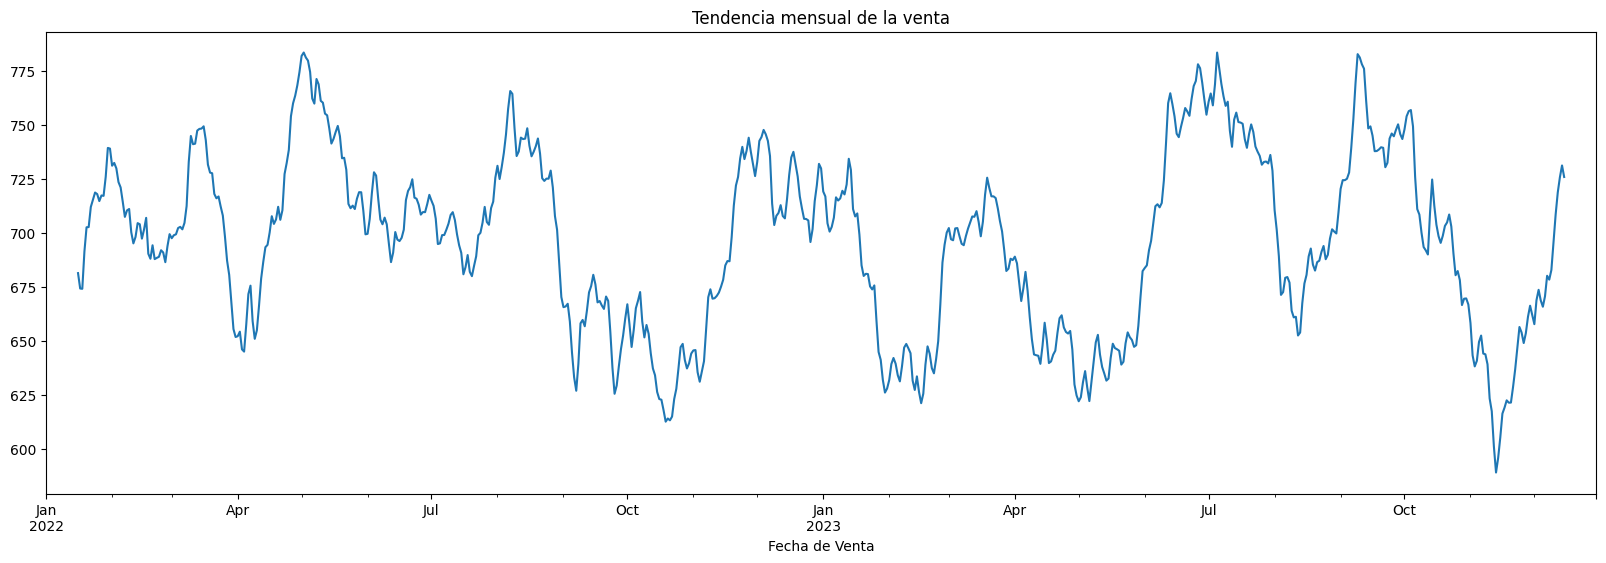

In [55]:
tendencia = descomposicion.trend

plt.figure(figsize=(20, 6))
plt.title('Tendencia mensual de la venta')
tendencia.plot()
plt.show()

- Correlación de varibales

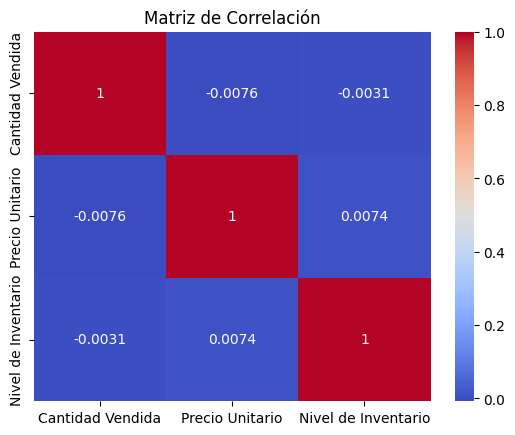

In [56]:
import seaborn as sns

correlacion = data_comportamiento[['Cantidad Vendida', 'Precio Unitario', 'Nivel de Inventario']].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- Relación Promoción o Descuento y Estacionalidad con la venta

In [63]:
import statsmodels.api as sm

relacion = data_comportamiento

relacion['Promoción'] = relacion['Promoción o Descuento'].astype(int)
relacion['Estacionalidad'] = relacion['Estacionalidad'].astype(int)

X = relacion[['Promoción', 'Estacionalidad']]
y = relacion['Cantidad Vendida']

X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

In [64]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Cantidad Vendida   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1243
Date:                Sun, 19 Jan 2025   Prob (F-statistic):              0.946
Time:                        15:25:12   Log-Likelihood:                -47846.
No. Observations:               10000   AIC:                         9.570e+04
Df Residuals:                    9996   BIC:                         9.573e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  50.9339      0.559     91.149      0.000      49.839      52.029
Promoción              -0.2804      0.579     -0.484      0.628      -1.416       0.855
Estacionalidad          0.1238      0.579      0.214      0.831      -1.012       1.259
Nivel de Inventario    -0.0006      0.002     -0.304      0.761      -0.004       0.003
==============================================================================
Omnibus:                     9010.369   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.699
Skew:                          -0.023   Prob(JB):                    4.91e-132
Kurtosis:                       1.796   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. Predicción y evaluación de error

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder

In [115]:
data_predict = dataset

In [116]:
data_predict['Fecha de Venta'] = pd.to_datetime(data_predict['Fecha de Venta'])
data_predict['Año'] = data_predict['Fecha de Venta'].dt.year
data_predict['Mes'] = data_predict['Fecha de Venta'].dt.month
data_predict['Día'] = data_predict['Fecha de Venta'].dt.day
data_predict['Día de la Semana'] = data_predict['Fecha de Venta'].dt.weekday

label_encoders = {}
for col in ['ID Producto', 'ID Tienda']:
    le = LabelEncoder()
    data_predict[col] = le.fit_transform(data_predict[col])
    label_encoders[col] = le

features = [
    'ID Producto', 'ID Tienda', 'Mes', 'Día', 'Día de la Semana',
    'Precio Unitario', 'Promoción o Descuento', 'Estacionalidad', 'Nivel de Inventario'
]
target = 'Cantidad Vendida'

In [117]:
X = data_predict[features]
y = data_predict[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
import time

start = time.time()
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
end = time.time()

y_pred = model.predict(X_test)

print(f"Tiempo de entrenamiento: {end - start:.2f} segundos")

- Evaluación del modelo

In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)

cv_mae_scores = -cv_mae_scores

In [125]:
print(f"Puntajes MAE por fold: {cv_mae_scores}")
print(f"MAE promedio: {cv_mae_scores.mean():.2f}")
print(f"Desviación estándar de MAE: {cv_mae_scores.std():.2f}")

Puntajes MAE por fold: [25.6041775 25.3996425 25.86957   25.5646825 25.05618  ]
MAE promedio: 25.50
Desviación estándar de MAE: 0.27


In [126]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [127]:
mae, rmse

(25.639207499999998, 29.709972286043957)

- Predicción de las ventas

In [136]:
ultima_fecha = data_predict['Fecha de Venta'].max()

fechas_futuras = pd.date_range(start=ultima_fecha + pd.Timedelta(days=1), periods=30)

futuro_data = pd.DataFrame({
    'Fecha de Venta': fechas_futuras,
    'ID Producto': label_encoders['ID Producto'].transform(['Producto_1'])[0],
    'ID Tienda': label_encoders['ID Tienda'].transform(['Tienda_1'])[0],
    'Precio Unitario': 274,
    'Promoción o Descuento': 0,
    'Estacionalidad': 0,
    'Nivel de Inventario': 151,
})

futuro_data['Año'] = futuro_data['Fecha de Venta'].dt.year
futuro_data['Mes'] = futuro_data['Fecha de Venta'].dt.month
futuro_data['Día'] = futuro_data['Fecha de Venta'].dt.day
futuro_data['Día de la Semana'] = futuro_data['Fecha de Venta'].dt.weekday

futuro_data = futuro_data[features]

In [137]:
predicciones = model.predict(futuro_data)

In [138]:
ventas_totales_30_dias = predicciones.sum()

In [139]:
print(f"Predicciones diarias para los próximos 30 días: {predicciones}")
print(f"Ventas totales estimadas para los próximos 30 días: {ventas_totales_30_dias:.2f} unidades")

Predicciones diarias para los próximos 30 días: [55.305 52.47  50.43  51.09  51.855 56.665 54.71  57.955 55.99  53.345
 55.57  53.89  57.445 58.685 61.875 56.8   52.545 53.375 52.535 57.27
 56.195 59.195 57.51  56.75  55.32  52.31  51.865 50.135 55.45  56.705]
Ventas totales estimadas para los próximos 30 días: 1651.24 unidades
